## About this dataset
- This publication contains statistics on causes of death for Australia, together with selected statistics on perinatal deaths. 
- In order to complete a death registration, the death must be certified by either a doctor using the Medical Certificate of Cause of Death, or by a coroner. In 2017, 88.1% of deaths were certified by a doctor. The remaining 11.9% were certified by a coroner. 

In [205]:
import pandas as pd
import altair as alt
import martha as mh

In [206]:
data = pd.read_csv("core/data/public/causes_of_death_2008-2011.csv")
data.head()

,cause_of_death,chapter,category,2008_Males,2008_Females,2008_Persons,2009_Males,2009_Females,2009_Persons,2010_Males,...,2014_Persons,2015_Males,2015_Females,2015_Persons,2016_Males,2016_Females,2016_Persons,2017_Males,2017_Females,2017_Persons
0,Intestinal infectious diseases,CHAPTER I Certain infectious and parasitic dis...,A00-A09,23,45,68,29,52,81,34,...,274,103,191,294,111,160,271,124,197,321
1,Cholera,CHAPTER I Certain infectious and parasitic dis...,A00,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Typhoid and paratyphoid fevers,CHAPTER I Certain infectious and parasitic dis...,A01,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,Other salmonella infections,CHAPTER I Certain infectious and parasitic dis...,A02,4,2,6,5,3,8,4,...,10,12,5,17,5,1,6,0,6,6
4,Shigellosis,CHAPTER I Certain infectious and parasitic dis...,A03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
data_tidy = data.melt(["cause_of_death", "chapter", "category"], var_name="year_sex", value_name="count")
data_tidy['year'] = data_tidy['year_sex'].map(lambda x: x.split("_")[0])
data_tidy['sex'] = data_tidy['year_sex'].map(lambda x: x.split("_")[1])
data_tidy = data_tidy.drop(columns=["year_sex", "category"])

# Convert count to an Integer
data_tidy['count'] = data_tidy['count'].map(lambda x: int(x.replace(",","")))

# Remove 'persons' as we can calculate this manually if need be
data_tidy = data_tidy[data_tidy['sex'].isin(['Males', 'Females'])]

data_tidy.head()

,cause_of_death,chapter,count,year,sex
0,Intestinal infectious diseases,CHAPTER I Certain infectious and parasitic dis...,23,2008,Males
1,Cholera,CHAPTER I Certain infectious and parasitic dis...,0,2008,Males
2,Typhoid and paratyphoid fevers,CHAPTER I Certain infectious and parasitic dis...,0,2008,Males
3,Other salmonella infections,CHAPTER I Certain infectious and parasitic dis...,4,2008,Males
4,Shigellosis,CHAPTER I Certain infectious and parasitic dis...,0,2008,Males


In [208]:
mh.summary(data_tidy)

,metric
Total Number of Rows,38460
Total Number of Columns,5
Numeric,1
String,4
Date,0
Total Size in Memory,12M
Total Missing %,0%


In [209]:
mh.columnStats(data_tidy)

,dataTypes,totalValues,uniqueValues,missingValues,missingPercent,uniquePercent,topRecurringValues
cause_of_death,object,38460,1915,0,0.0,4.98,Malignant neoplasms of independent (primary) m...
chapter,object,38460,19,0,0.0,0.05,CHAPTER XX External causes of morbidity and mo...
count,int64,38460,1491,0,0.0,3.88,0
year,object,38460,10,0,0.0,0.03,2014
sex,object,38460,2,0,0.0,0.01,Males


In [210]:
data_tidy['chapter'].unique()

array(['CHAPTER I Certain infectious and parasitic diseases',
       'CHAPTER II Neoplasms',
       'CHAPTER III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
       'CHAPTER IV Endocrine, nutritional and metabolic diseases',
       'CHAPTER V Mental and behavioural disorders',
       'CHAPTER VI Diseases of the nervous system',
       'CHAPTER VII Diseases of the eye and adnexa',
       'CHAPTER VIII Diseases of the ear and mastoid process',
       'CHAPTER IX Diseases of the circulatory system',
       'CHAPTER X Diseases of the respiratory system',
       'CHAPTER XI Diseases of the digestive system',
       'CHAPTER XII Diseases of the skin and subcutaneous tissue',
       'CHAPTER XIII Diseases of the musculoskeletal system and connective tissue',
       'CHAPTER XIV Diseases of the genitourinary system',
       'CHAPTER XV Pregnancy, childbirth and the puerperium',
       'CHAPTER XVI Certain conditions originating in the pe

In [211]:
chapterMappings = {
'CHAPTER I Certain infectious and parasitic diseases': 'Certain infectious and parasitic diseases',
'CHAPTER II Neoplasms': 'Neoplasms',
'CHAPTER III Diseases of the blood and blood-forming organs and certain disorders involving the immune': 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
'CHAPTER IV Endocrine, nutritional and metabolic diseases': 'Endocrine, nutritional and metabolic diseases',
'CHAPTER V Mental and behavioural disorders': 'Mental and behavioural disorders',
'CHAPTER VI Diseases of the nervous system': 'Diseases of the nervous system',
'CHAPTER VII Diseases of the eye and adnexa': 'Diseases of the eye and adnexa',
'CHAPTER VIII Diseases of the ear and mastoid process': 'Diseases of the ear and mastoid process',
'CHAPTER IX Diseases of the circulatory system': 'Diseases of the circulatory system',
'CHAPTER X Diseases of the respiratory system': 'Diseases of the respiratory system',
'CHAPTER XI Diseases of the digestive system': 'Diseases of the digestive system',
'CHAPTER XII Diseases of the skin and subcutaneous tissue': 'Diseases of the skin and subcutaneous tissue',
'CHAPTER XIII Diseases of the musculoskeletal system and connective tissue': 'Diseases of the musculoskeletal system and connective tissue',
'CHAPTER XIV Diseases of the genitourinary system': 'Diseases of the genitourinary system',
'CHAPTER XV Pregnancy, childbirth and the puerperium': 'Pregnancy, childbirth and the puerperium',
'CHAPTER XVI Certain conditions originating in the perinatal period': 'Certain conditions originating in the perinatal period',
'CHAPTER XVII Congenital malformations, deformations and chromosomal abnormalities': 'Congenital malformations, deformations and chromosomal abnormalities',
'CHAPTER XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified': 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
'CHAPTER XX External causes of morbidity and mortality': 'External causes of morbidity and mortality'
}

data_tidy['chapter'] = data_tidy['chapter'].map(chapterMappings)
data_tidy.head()

,cause_of_death,chapter,count,year,sex
0,Intestinal infectious diseases,Certain infectious and parasitic diseases,23,2008,Males
1,Cholera,Certain infectious and parasitic diseases,0,2008,Males
2,Typhoid and paratyphoid fevers,Certain infectious and parasitic diseases,0,2008,Males
3,Other salmonella infections,Certain infectious and parasitic diseases,4,2008,Males
4,Shigellosis,Certain infectious and parasitic diseases,0,2008,Males


In [292]:
mappings = {
    'Mental and behavioural disorders due to psychoactive substance use': 'Mental Disorder due to substance use',
    'Mental and behavioural disorders due to use of alcohol': 'Mental Disorder due to substance use',
    'Organic, including symptomatic, mental disorders': 'Symptomatic Mental Disorders',
    'Delirium, not induced by alcohol and other psychoactive substances': 'Delirium',
    'Unspecified dementia': 'Dementia',
    'Vascular dementia': 'Dementia',
    'Mood [affective] disorders': 'Depression',
    'Depressive episode': 'Depression',
    'Schizophrenia, schizotypal and delusional disorders': 'Schizophrenia',
    'Schizophrenia': 'Schizophrenia',
    'Other external causes of accidental injury': 'Other', 
    'Other external causes of mortality': 'Other',
    'Intentional self-harm': 'Suicide',
    'Falls': 'Falls',
    'Transport accidents': 'Transport Accidents',
    'Intentional self-harm by hanging, strangulation and suffocation': 'Suicide',
    'Unspecified fall': 'Falls',
    'Accidental poisoning by and exposure to noxious substances': 'Accidental Poisoning',
    'Car occupant injured in transport accident': 'Transport Accidents',
    'Accidental exposure to other and unspecified factors': 'Other'
}

data_tidy['cause_of_death_map'] = data_tidy['cause_of_death'].map(mappings)

In [293]:
data_tidy['cause_of_death_map'].unique().tolist()

[nan,
 'Symptomatic Mental Disorders',
 'Dementia',
 'Delirium',
 'Mental Disorder due to substance use',
 'Schizophrenia',
 'Depression',
 'Transport Accidents',
 'Other',
 'Falls',
 'Accidental Poisoning',
 'Suicide']

In [214]:
data_tidy.to_csv("core/data/public/causesofdeath.csv", index=False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/altair/utils/core.py:81: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ))


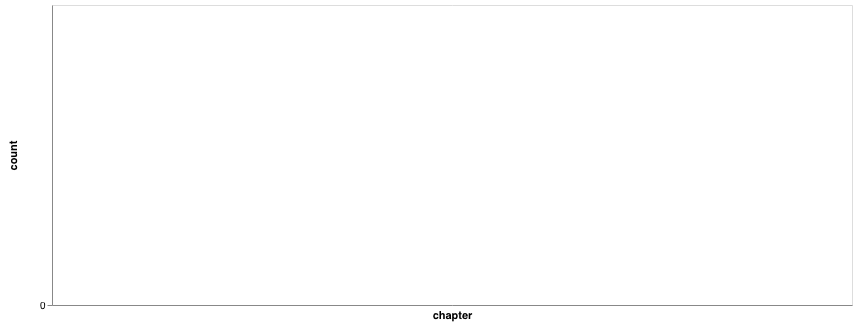

In [193]:
chartData = data_tidy.groupby(["chapter"]).agg({"count": "sum"}).reset_index()

alt.Chart(chartData).mark_bar().encode(
    x=alt.X("chapter", sort=alt.SortField("sum","count", order="descending")),
    y="count",
    tooltip=chartData.columns.tolist()
).properties(
    width=800
)

## Some Definitions
- Neoplasms: a new and abnormal growth of tissue in a part of the body, especially as a characteristic of cancer.
- Diseases of the circulatory system: The circulatory system is a network consisting of blood, blood vessels, and the heart.
- External Causes: E.g. Murder, Drowing, Falling etc

### A look at the Mental and Behaviour Disorder deaths

In [178]:
mbd = data_tidy[data_tidy['chapter'] == 'V Mental and behavioural disorders']
mbd.head()

,cause_of_death,chapter,count,year,sex,cause_of_death_map
467,"Organic, including symptomatic, mental disorders",V Mental and behavioural disorders,1982,2008,Males,Symptomatic Mental Disorders
468,Vascular dementia,V Mental and behavioural disorders,404,2008,Males,Dementia
469,Unspecified dementia,V Mental and behavioural disorders,1512,2008,Males,Dementia
470,"Organic amnesic syndrome, not induced by alcoh...",V Mental and behavioural disorders,0,2008,Males,NaN
471,"Delirium, not induced by alcohol and other psy...",V Mental and behavioural disorders,50,2008,Males,NaN


In [290]:
# {
#     'Mental and behavioural disorders due to psychoactive substance use': 'Mental Disorder due to substance use',
#     'Mental and behavioural disorders due to use of alcohol': 'Mental Disorder due to substance use',
#     'Organic, including symptomatic, mental disorders': 'Symptomatic Mental Disorders',
#     'Delirium, not induced by alcohol and other psychoactive substances': 'Delirium',
#     'Unspecified dementia': 'Dementia',
#     'Vascular dementia': 'Dementia',
#     'Mood [affective] disorders': 'Depression',
#     'Depressive episode': 'Depression',
#     'Schizophrenia, schizotypal and delusional disorders': 'Schizophrenia',
#     'Schizophrenia': 'Schizophrenia'
# }

{'Mental and behavioural disorders due to psychoactive substance use': 'Mental Disorder due to substance use',
 'Mental and behavioural disorders due to use of alcohol': 'Mental Disorder due to substance use',
 'Organic, including symptomatic, mental disorders': 'Symptomatic Mental Disorders',
 'Delirium, not induced by alcohol and other psychoactive substances': 'Delirium',
 'Unspecified dementia': 'Dementia',
 'Vascular dementia': 'Dementia',
 'Mood [affective] disorders': 'Depression',
 'Depressive episode': 'Depression',
 'Schizophrenia, schizotypal and delusional disorders': 'Schizophrenia',
 'Schizophrenia': 'Schizophrenia'}

In [289]:
# Head value will return top x based on counts
top_x = mbd.groupby("cause_of_death").agg({"count" : "sum"}).reset_index().sort_values("count", ascending=False).reset_index(drop=True).head(10)

top_x['cause_of_death'].unique().tolist()

['Organic, including symptomatic, mental disorders',
 'Unspecified dementia',
 'Vascular dementia',
 'Mental and behavioural disorders due to psychoactive substance use',
 'Mental and behavioural disorders due to use of alcohol',
 'Delirium, not induced by alcohol and other psychoactive substances',
 'Mood [affective] disorders',
 'Depressive episode',
 'Schizophrenia, schizotypal and delusional disorders',
 'Schizophrenia']

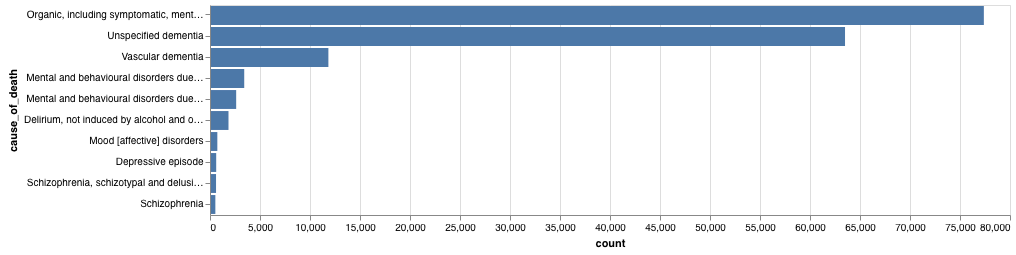

In [285]:
alt.Chart(top_x).mark_bar().encode(
    y=alt.Y("cause_of_death", sort=alt.SortField("sum", "count", order="descending")),
    x="count",
    tooltip=top_x.columns.tolist()
).properties(
    width=800
)

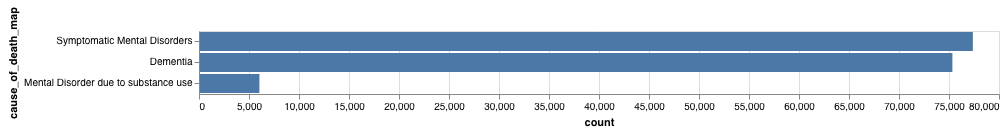

In [270]:
# Head value will return top x based on counts
top_x = mbd.groupby("cause_of_death_map").agg({"count" : "sum"}).reset_index().sort_values("count", ascending=False).reset_index(drop=True)

alt.Chart(top_x).mark_bar().encode(
    y=alt.Y("cause_of_death_map", sort=alt.SortField("sum", "count", order="descending")),
    x="count",
    tooltip=top_x.columns.tolist()
).properties(
    width=800
)

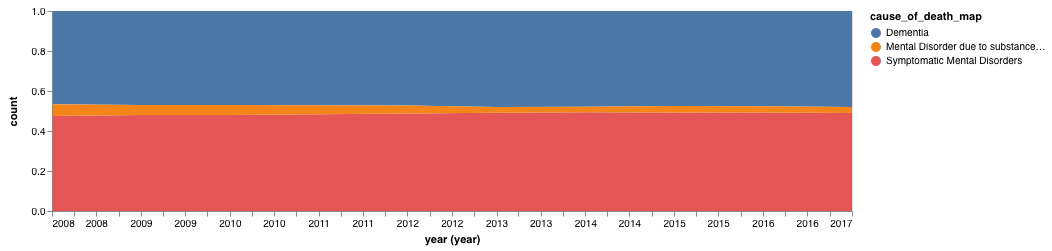

In [261]:
chartData = mbd.groupby(["cause_of_death_map", "year"]).agg({"count" : "sum"}).reset_index().sort_values("count", ascending=False).reset_index(drop=True)

alt.Chart(chartData).mark_area().encode(
    x=alt.X("year:T", timeUnit="year"),
    y=alt.Y("count", stack="normalize"),
    color="cause_of_death_map"
).properties(
    width=800,
    height=200
)

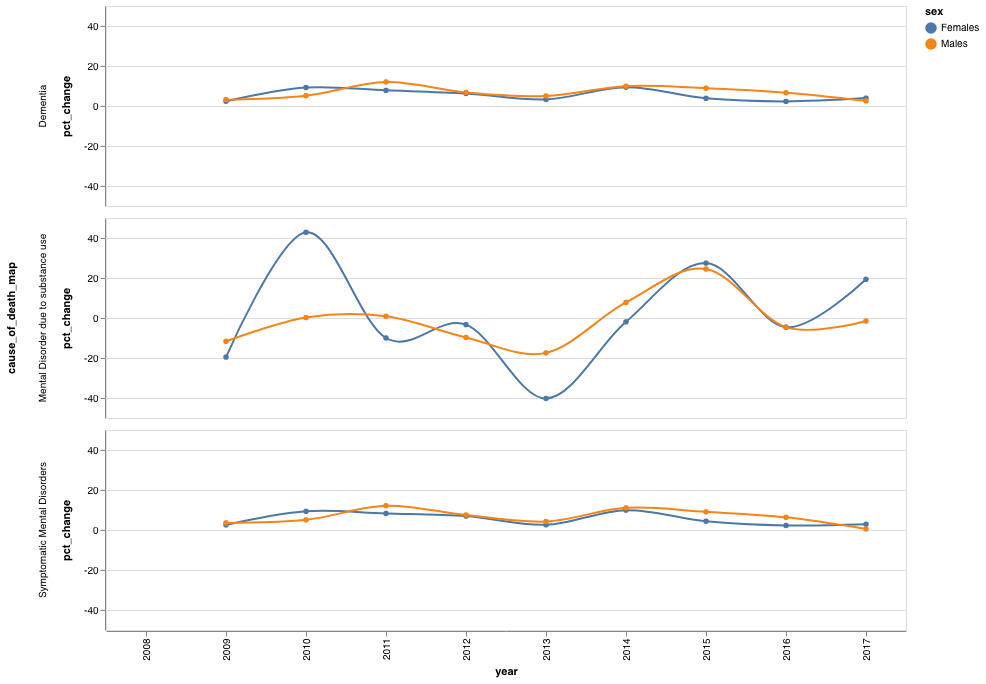

In [182]:
def calcRateOfChange(x):
    data = x.sort_values("year")
    data['pct_change'] = (data['count'].pct_change()) * 100
    return data

chartData = chartData.groupby(["cause_of_death_map", "sex"]).apply(lambda x: calcRateOfChange(x)).reset_index(drop=True)

alt.Chart(chartData).mark_line(
    point=True,
    interpolate="cardinal"
).encode(
    x=alt.X("year"),
    y=alt.Y("pct_change"),
    color="sex",
    row="cause_of_death_map"
).properties(
    width=800,
    height=200
)

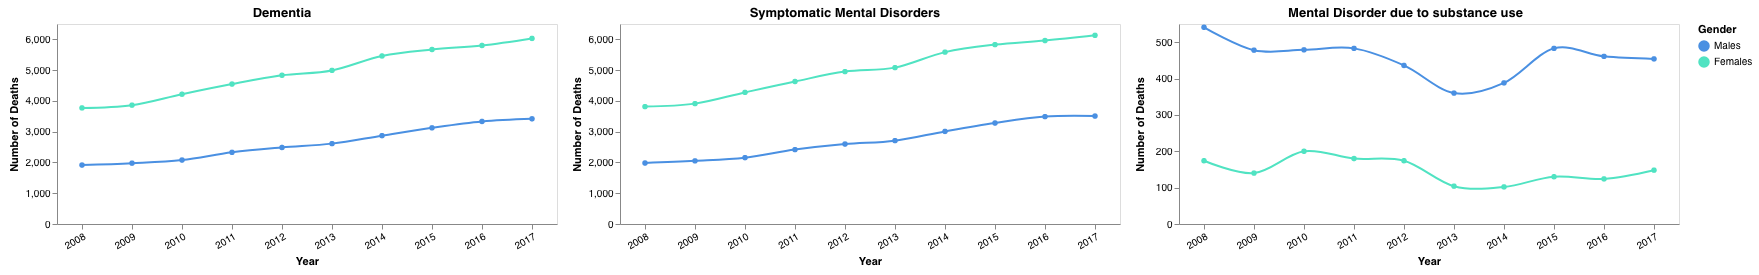

In [183]:
colorScale = alt.Scale(
    domain=['Males', 'Females'],
    range=['#4A90E2', '#50E3C2']
)

base = alt.Chart(chartData).mark_line(
    point=True,
    interpolate="cardinal"
).encode(
    x=alt.X("year", type="nominal", axis=alt.Axis(labelAngle=330), title="Year"),
    y=alt.Y("count", title="Number of Deaths"),
    tooltip=chartData.columns.tolist(),
    color=alt.Color("sex", scale=colorScale, legend=alt.Legend(title="Gender"))
).properties(
    width=500,
    height=200
)

one = base.transform_filter(
    alt.FieldEqualPredicate(field='cause_of_death_map', equal='Dementia')
).properties(
    title='Dementia'
)

two = base.transform_filter(
    alt.FieldEqualPredicate(field='cause_of_death_map', equal='Mental Disorder due to substance use')
).properties(
    title='Mental Disorder due to substance use'
)

three = base.transform_filter(
    alt.FieldEqualPredicate(field='cause_of_death_map', equal='Symptomatic Mental Disorders')
).properties(
    title='Symptomatic Mental Disorders'
)

alt.hconcat(one, three, two).configure(
    axis=alt.Axis(grid=False)
)

In [184]:
chartData[chartData['year'].isin(['2008', '2017'])].groupby(['cause_of_death_map', 'sex']).apply(lambda x: calcRateOfChange(x)).reset_index(drop=True).dropna()[['cause_of_death_map', 'sex', 'pct_change']]

,cause_of_death_map,sex,pct_change
1,Dementia,Females,59.888653
3,Dementia,Males,78.444676
5,Mental Disorder due to substance use,Females,-14.942529
7,Mental Disorder due to substance use,Males,-16.081331
9,Symptomatic Mental Disorders,Females,60.733945
11,Symptomatic Mental Disorders,Males,76.992936


### A look at External causes of morbidity and mortality

In [263]:
ed = data_tidy[data_tidy['chapter'] == 'External causes of morbidity and mortality']
ed.head()

,cause_of_death,chapter,count,year,sex,cause_of_death_map
1510,Transport accidents,External causes of morbidity and mortality,1205,2008,Males,Transport Accidents
1511,Pedestrian injured in transport accident,External causes of morbidity and mortality,160,2008,Males,NaN
1512,Pedestrian injured in collision with pedal cycle,External causes of morbidity and mortality,1,2008,Males,NaN
1513,Pedestrian injured in collision with two- or t...,External causes of morbidity and mortality,3,2008,Males,NaN
1514,"Pedestrian injured in collision with car, pick...",External causes of morbidity and mortality,113,2008,Males,NaN


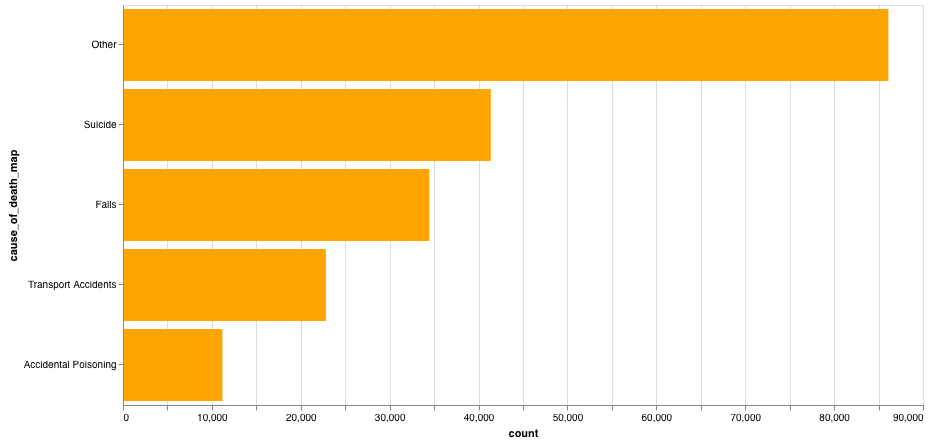

In [264]:
causeCounts = ed.groupby("cause_of_death_map").agg({"count": "sum"}).reset_index().sort_values("count", ascending=False).head(10)

alt.Chart(causeCounts).mark_bar(color="orange").encode(
    y=alt.Y("cause_of_death_map", sort=alt.SortField("sum", "count", order="descending")),
    x=alt.X("count"),
    tooltip=causeCounts.columns.tolist()
).properties(
    width=800,
    height=400
)

In [273]:
causeCounts = ed.groupby(["cause_of_death_map", "sex", "year"]).agg({"count": "sum"}).reset_index().sort_values("count", ascending=False)

causeCounts.head()

,cause_of_death_map,sex,year,count
59,Other,Males,2017,6050
58,Other,Males,2016,5997
57,Other,Males,2015,5887
56,Other,Males,2014,5520
54,Other,Males,2012,4906


In [187]:
causeCounts.cause_of_death.unique().tolist()

['Other external causes of accidental injury',
 'Other external causes of mortality',
 'Intentional self-harm',
 'Falls',
 'Transport accidents',
 'Intentional self-harm by hanging, strangulation and suffocation',
 'Unspecified fall',
 'Accidental poisoning by and exposure to noxious substances',
 'Car occupant injured in transport accident',
 'Accidental exposure to other and unspecified factors']

In [ ]:
causeCounts[causeCounts['year'].isin(['2008', '2017'])].groupby(['cause_of_death_map', 'sex']).apply(lambda x: calcRateOfChange(x)).reset_index(drop=True).dropna()[['cause_of_death_map', 'sex', 'pct_change']]